In [1]:
# Best get a library card because we're about to IMPORT SOME LIBRARIES!

import numpy as np
import matplotlib.pyplot as plt
import urllib.request as url
import math as m
import numpy.ma as ma
import matplotlib.patches as mpatches

%matplotlib inline

### Import Data File

In [2]:
print(' Reading in the exoplanet date')

DataLocation = 'https://www.scidrive.org/vospace-2.0/data/'
FileName = '6301ed79-1eca-44cb-aa0d-89f1712f4a2f'

# Grab file, list entries.

urlName = DataLocation + FileName
print('Attempting to read the file', urlName)

LocalFile = url.urlretrieve(urlName)

data = np.genfromtxt(LocalFile[0], None,  names=True, \
                        skip_header=358, unpack=True, delimiter=",", invalid_raise=False, missing_values=' ', usemask=False) #This database has 357 lines of code before data tables start

# Printing Field Names

print('Data Available in ', urlName, ':')
print(LocalFile)
print(data.dtype.names)


 Reading in the exoplanet date
Attempting to read the file https://www.scidrive.org/vospace-2.0/data/6301ed79-1eca-44cb-aa0d-89f1712f4a2f


/home/idies/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: ConversionWarning: Some errors were detected !
    Line #879 (got 154 columns instead of 355)
    Line #4041 (got 156 columns instead of 355)
    Line #4131 (got 154 columns instead of 355)
  del sys.path[0]
/home/idies/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  del sys.path[0]


Data Available in  https://www.scidrive.org/vospace-2.0/data/6301ed79-1eca-44cb-aa0d-89f1712f4a2f :
('/tmp/tmpaevvwf6z', <http.client.HTTPMessage object at 0x7f25390b01d0>)
('rowid', 'pl_hostname', 'pl_letter', 'pl_name', 'pl_discmethod', 'pl_pnum', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_orbincl', 'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_orbincllim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_denslim', 'pl_ttvflag', 'pl_kepflag', 'pl_k2flag', 'pl_nnotes', 'ra_str', 'ra', 'dec_str', 'dec', 'st_dist', 'st_disterr1', 'st_disterr2', 'st_distlim', 'st_optmag', 'st_optmagerr', 'st_optmaglim', 'st_optband', 'gaia_gmag', 'gaia_gmagerr', 'gaia_gmaglim', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_t

### For future reference

#### Planet name: Column 3 
#### Planet radius: Column 27 (in Jupiter Radii)
#### Planet mass: Column 22 (in Jupiter Mass)

In [3]:
print('For example:')
print('Planet ', data[0][3], ' has a radius ', data[0][27], ' in Jupiter Radii. It has a mass of ', data[0][22], ' in Jupiter Masses')

For example:
Planet  b'11 Com b'  has a radius  nan  in Jupiter Radii. It has a mass of  19.4  in Jupiter Masses


#### For the example above, the radius is provided as 'nan', meaning there's no data available. 
#### We have to filter out any planet that is missing one of the two points.

### Create 2 arrays for the masses and radii of planets that are not flagged for missing either the mass or radius

We can loop through our planet arrays by number and append a new array with the respective mass or radius value.
Each time we loop through we skip to the next iteration if the planet is flagged

In [4]:
# Iterates through the data, determines if both data points are available, and adds the data to their respective arrays

massesObs = [] # initializes mass array
errorMass = []
radiiObs = [] # initializes radius array
errorRadius = []

for i in range(0,3835):
    if np.isnan(data[i][22]) == False and np.isnan(data[i][27]) == False: # conditional statement to weed out missing data
        massesObs.append(data[i][22]) # appends the mass array with new item
        errorMass.append(data[i][23])
        radiiObs.append(data[i][27]) # appends the radius array with new item
        errorRadius.append(data[i][28])

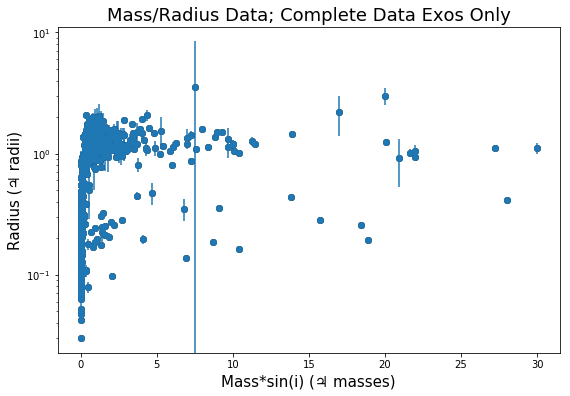

In [5]:
# Creates a scatter plot of our mass radius data

# assigning data to x/y variables for convenience
x = massesObs
y = radiiObs
e = errorRadius

plt.figure(figsize=(9,6))
plt.semilogy(x, y, 'ok')
plt.errorbar(x, y, yerr = e, fmt='o')
plt.xlabel('Mass*sin(i) (\u2643 masses)', fontsize=15)
plt.ylabel('Radius (\u2643 radii)', fontsize=15)
plt.title('Mass/Radius Data; Complete Data Exos Only', fontsize=18)
plt.savefig('massradiuscomplete.png')


## Remove bad data
A lot of garbage data that won't allign with any reasonable broken power law.
Additionlly one point has an insane amount of error on the radius... Also needs to be omitted

In [6]:
# Conveniently the problem point has the largest radius so we can find the point easily
print('Index for problem point : ', radiiObs.index(max(radiiObs)))

Index for problem point :  68


In [7]:
# Removes bad data point from each array 
massesObs.pop(68)
radiiObs.pop(68)
errorRadius.pop(68)

4.87

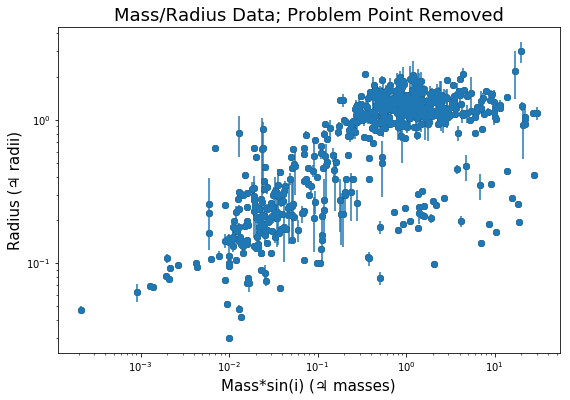

In [8]:
# Plots data so we can check to see if the problem point was removed

# assigning data to x/y variables for convenience
x = massesObs
y = radiiObs
e = errorRadius

plt.figure(figsize=(9,6))
plt.loglog(x, y, 'ok')
plt.errorbar(x, y, yerr = e, fmt='o')
plt.xlabel('Mass*sin(i) (\u2643 masses)', fontsize=15)
plt.ylabel('Radius (\u2643 radii)', fontsize=15)
plt.title('Mass/Radius Data; Problem Point Removed', fontsize=18)
plt.savefig('massradiusminusproblempoint.png')


Now we need to remove the points that lie well below our broken power law...

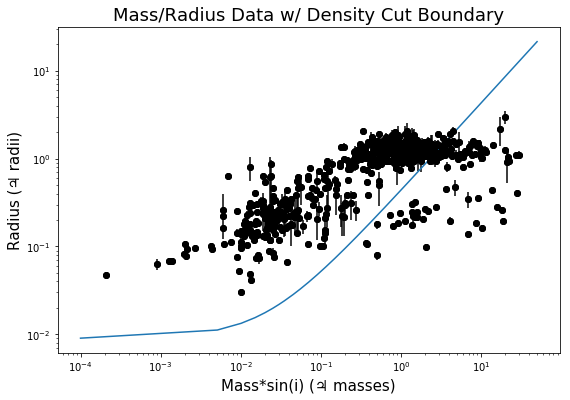

In [9]:
# Plots data with line for our density cut

# assigning data to x/y variables for convenience
x = massesObs
y = radiiObs
e = errorRadius
x2 = np.linspace(10**(-4),50,10000)

plt.figure(figsize=(9,6))
plt.loglog(x, y, 'ok')
plt.plot(x2, 0.4298*x2 + 0.00899) # this will be the boundary for our density cut
plt.errorbar(x, y, yerr = e, fmt='ok')
plt.xlabel('Mass*sin(i) (\u2643 masses)', fontsize=15)
plt.ylabel('Radius (\u2643 radii)', fontsize=15)
plt.title('Mass/Radius Data w/ Density Cut Boundary', fontsize=18)
plt.savefig('massradiusshowsdensitycutbound.png')


In [10]:
# Omits data beneath our density cut.

for k in range(0,3):
    i = 0
    while i < len(massesObs):  # used while loop as the length of massesObs continually will change
        z = (0.4298*massesObs[i]) + 0.00899 # a theoretical y value as if the density cut is a fit
        if radiiObs[i] < z:  # conditional to determine if the actual y value is less than the "fit" of the density cut
            massesObs.pop(i) # omits data from the arrays
            radiiObs.pop(i)
            errorRadius.pop(i)
        i += 1

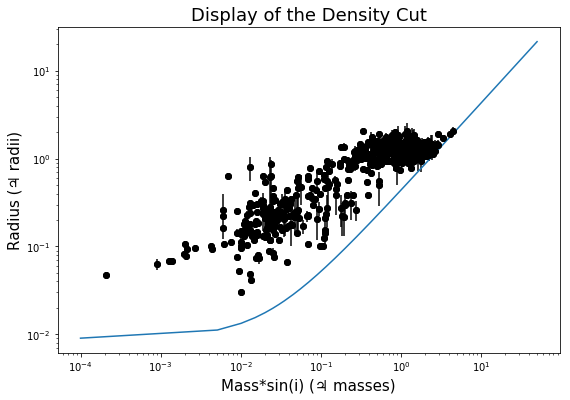

In [11]:
# Plots data with the density cut

# assigning data to x/y variables for convenience
x = massesObs
y = radiiObs
e = errorRadius
x2 = np.linspace(10**(-4),50,10000)

plt.figure(figsize=(9,6))
plt.loglog(x, y, 'ok')
plt.plot(x2, 0.4298*x2 + 0.00899) # this will be the boundary for our density cut
plt.errorbar(x, y, yerr = e, fmt='ok')
plt.xlabel('Mass*sin(i) (\u2643 masses)', fontsize=15)
plt.ylabel('Radius (\u2643 radii)', fontsize=15)
plt.title('Display of the Density Cut', fontsize=18)
plt.savefig('massradiusdensitycut.png')


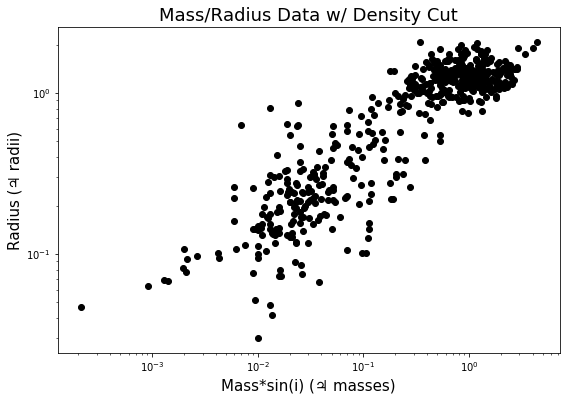

In [12]:
# Plots data that will be used for our broken power law

# assigning data to x/y variables for convenience
x = massesObs
y = radiiObs
e = errorRadius

plt.figure(figsize=(9,6))
plt.loglog(x, y, 'ok')
plt.xlabel('Mass*sin(i) (\u2643 masses)', fontsize=15)
plt.ylabel('Radius (\u2643 radii)', fontsize=15)
plt.title('Mass/Radius Data w/ Density Cut', fontsize=18)
plt.savefig('massradiusdensitycutnoline.png')


### First fit equation boundaries: 0,0.2

In [13]:
# it will be helpful to create arrays for data within our boundary
massFit1 = []
radiusFit1 = []
erroryFit1 = []

for i in range(0, len(massesObs)):
    if massesObs[i] < 0.25:
        massFit1.append(massesObs[i])
        radiusFit1.append(radiiObs[i])
        erroryFit1.append(errorRadius[i])

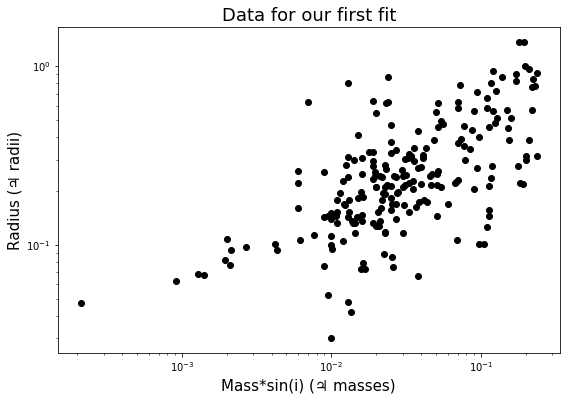

In [14]:
# Plots data that will be used for first fit

# assigning data to x/y variables for convenience
x = massFit1
y = radiusFit1
e = erroryFit1

plt.figure(figsize=(9,6))
plt.loglog(x, y, 'ok')
plt.xlabel('Mass*sin(i) (\u2643 masses)', fontsize=15)
plt.ylabel('Radius (\u2643 radii)', fontsize=15)
plt.title('Data for our first fit', fontsize=18)
plt.savefig('fit1data.png')


In [15]:
# where our fit line will be of the form y = C*x^m

# Using the John Taylor Least Squares Method
m = np.log10(0.9/0.1) / np.log10(0.2/0.001)

print('y = x^',m)

# creates data for our fit curve
x3 = np.linspace(10**(-4),50,10000)
ypost = np.power(x3,m)


y = x^ 0.414702333840707


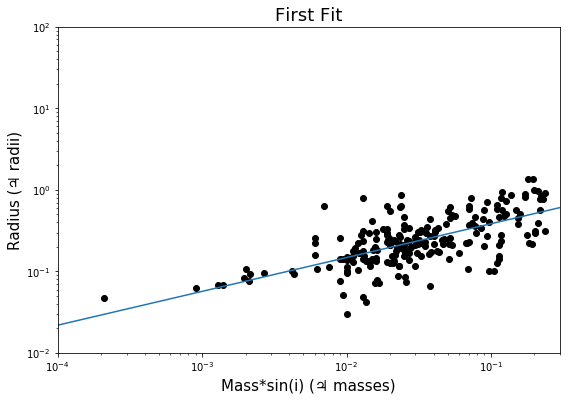

In [16]:
# Plots first fit

# assigning data to x/y variables for convenience
x = massFit1
y = radiusFit1
e = erroryFit1

plt.figure(figsize=(9,6))
plt.loglog(x, y, 'ok')
plt.plot(x3,ypost)
plt.xlabel('Mass*sin(i) (\u2643 masses)', fontsize=15)
plt.ylabel('Radius (\u2643 radii)', fontsize=15)
plt.title('First Fit', fontsize=18)
plt.xlim(10**(-4),3*10**(-1))
plt.ylim(10**(-2),100)
plt.savefig('fit1.png')



### Second fit equation boundaries: 0.2, 50

In [17]:
# create arrays for the data within our boundaries
massFit2 = []
radiusFit2 = []
erroryFit2 = []

for i in range(0, len(massesObs)):
    if 0.25 < massesObs[i]:
        massFit2.append(massesObs[i])
        radiusFit2.append(radiiObs[i])
        erroryFit2.append(errorRadius[i])

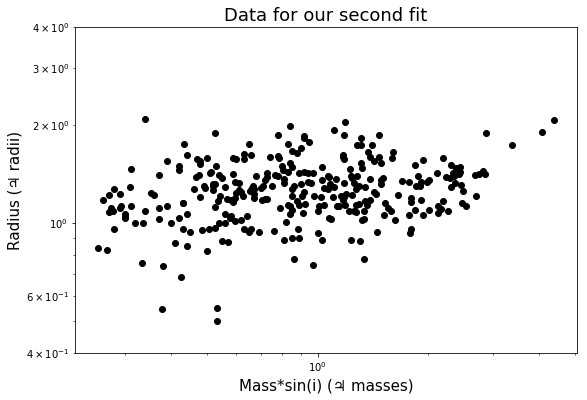

In [18]:
# Plots data that will be used for second fit

# assigning data to x/y variables for convenience
x = massFit2
y = radiusFit2
e = erroryFit2

plt.figure(figsize=(9,6))
plt.loglog(x, y, 'ok')
plt.xlabel('Mass*sin(i) (\u2643 masses)', fontsize=15)
plt.ylabel('Radius (\u2643 radii)', fontsize=15)
plt.title('Data for our second fit', fontsize=18)
plt.ylim(4*10**(-1),2*2)
plt.savefig('fit2data.png')


In [19]:
# where our fit line will be of the form y = C*x^m

# Using the John Taylor Least Squares Method
m2 = np.log10(1.6/1.2) / np.log10(3/0.3)

print('y = 1.25*x^',m2)

# creates data for our fit curve
x4 = np.linspace(0.2,50,10000)
y2post = np.multiply(1.25,np.power(x4,m2))


y = 1.25*x^ 0.12493873660829999


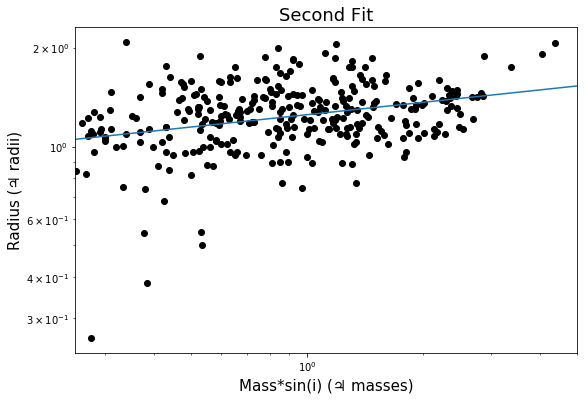

In [20]:
# Plots second fit

# assigning data to x/y variables for convenience
x = massFit2
y = radiusFit2
e = erroryFit2

plt.figure(figsize=(9,6))
plt.loglog(x, y, 'ok')
plt.plot(x4,y2post)
plt.xlabel('Mass*sin(i) (\u2643 masses)', fontsize=15)
plt.ylabel('Radius (\u2643 radii)', fontsize=15)
plt.title('Second Fit', fontsize=18)
plt.xlim(0.25,5)
plt.savefig('fit2.png')



## We now have our broken power law
#### From 0 to 0.2: f(x) = x^0.4147
#### From 0.2 to 5: f(x) = 1.25*x^0.149387

In [21]:
# Generates arrays for our fit
bigFitx = np.linspace(10**(-4),5,1000)
bigFity = []

for i in range(0,len(bigFitx)):
    if 0 <= bigFitx[i] and bigFitx[i] <= 0.2:
        bigFity.append(np.power(bigFitx[i],0.4147))
    if 0.2 <= bigFitx[i] and bigFitx[i] <= 5:
        bigFity.append(np.multiply(1.25,np.power(bigFitx[i],0.149387)))


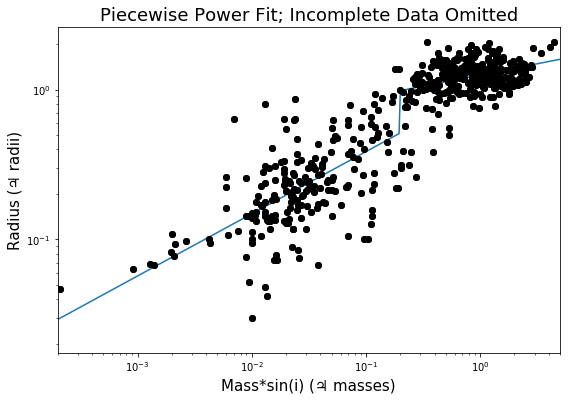

In [22]:
# Plots data with both fit lines

# assigning data to x/y variables for convenience
x = massesObs
y = radiiObs
e = errorRadius
xfit = bigFitx
yfit = bigFity

plt.figure(figsize=(9,6))
plt.loglog(x, y, 'ok')
plt.plot(xfit,yfit)
plt.errorbar(x, y, fmt='ok')
plt.xlabel('Mass*sin(i) (\u2643 masses)', fontsize=15)
plt.ylabel('Radius (\u2643 radii)', fontsize=15)
plt.title('Piecewise Power Fit; Incomplete Data Omitted', fontsize=18)
plt.xlim(2*10**(-4),5)
plt.savefig('datawithpiecewisefit.png')


### Create arrays for exos missing mass/radius data

In [23]:
# Iterates through the data, determines if both data points are available, and adds the data to their respective arrays if any data is missing

massesInc = [] # initializes mass array
radiiInc = [] # initializes radius array

for i in range(0,3835):
    if np.isnan(data[i][22]) == True or np.isnan(data[i][27]) == True: # conditional statement to find missing data
        massesInc.append(data[i][22]) # appends the mass array with new item
        radiiInc.append(data[i][27]) # appends the radius array with new item

### Iterate through and fill in the missing data

In [24]:
for i in range(0,len(massesInc)):
    if massesInc[i] <= 0.2 and np.isnan(massesInc[i]) == False:
        radiiInc[i] = (np.power(massesInc[i],0.4147))
for i in range(0,len(massesInc)):
    if 0.2 <= massesInc[i] and np.isnan(massesInc[i]) == False:
        radiiInc[i] = (1.25*np.power(massesInc[i],0.149387))

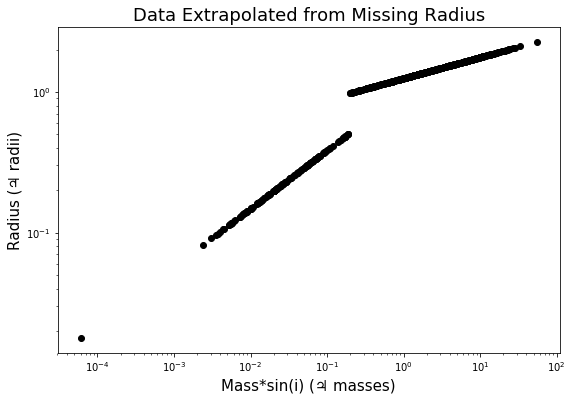

In [25]:
# Plots extrapolated data points

# assigning data to x/y variables for convenience
x = massesInc
y = radiiInc

plt.figure(figsize=(9,6))
plt.loglog(x, y, 'ok')
plt.xlabel('Mass*sin(i) (\u2643 masses)', fontsize=15)
plt.ylabel('Radius (\u2643 radii)', fontsize=15)
plt.title('Data Extrapolated from Missing Radius', fontsize=18)
plt.savefig('extrapolateddata1.png')


# Next steps
### 1) I've only fit the data for which we were missing the Radius... We need to rearrange our fit equations, solve for x, and add it the cell above (cell 26) so that it iterates through and adds those as well...
### 2) It occurred to me that we can and should include error in our extrapolated data. Obviously missing data doesn't have error associated with it, but we can use propagation of errors to determine it. (Wyatt this might be a good task for you since we learned that in 3700.)
### 3) Part d should be pretty straight forward
### 4) Part e is a little bit more challenging, but he walks us through it step by step. You'll need to use an array of the planets that are missing radius data I believe. I've already written a bit of code somewhere above that shows how to flag and find this conditionally. That should get you rolling.
### 5) We need to take a hard look at this stuff conceptually before Monday! There's a lot more to talk about than it seems.


In [26]:
massesInc2 = []
radiiInc2 = []

for i in range(0,3835):
    if np.isnan(data[i][22]) == True or np.isnan(data[i][27]) == True: # conditional statement to find missing data
        massesInc2.append(data[i][22]) # appends the mass array with new item
        radiiInc2.append(data[i][27]) # appends the radius array with new item

out_array = np.array(radiiInc2)

In [27]:
# In[144]:


logarray1 = (1/0.4147)*np.log10(out_array)
logarray2 = (1/0.149387)*np.log10(out_array/1.25)

In [28]:
# In[145]:


for i in range(0,len(out_array)):
    if out_array[i] <= 0.5130233582040606 and np.isnan(out_array[i]) == False and np.isnan(massesInc2[i]) == True:
        massesInc2[i] = (np.power(10,logarray1[i]))
    if 0.9828629879254385 <= out_array[i] and np.isnan(out_array[i]) == False and np.isnan(massesInc2[i]) == True:
        massesInc2[i] = (np.power(10,logarray2[i]))

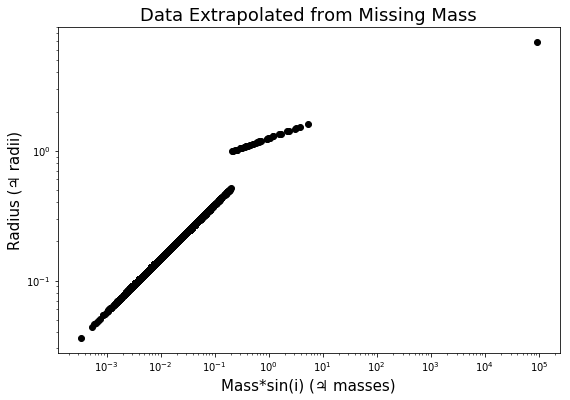

In [29]:
# In[147]:


# assigning data to x/y variables for convenience
xx = massesInc2
yy = radiiInc2

plt.figure(figsize=(9,6))
plt.loglog(xx, yy, 'ok')
plt.xlabel('Mass*sin(i) (\u2643 masses)', fontsize=15)
plt.ylabel('Radius (\u2643 radii)', fontsize=15)
plt.title('Data Extrapolated from Missing Mass', fontsize=18)
plt.savefig('extrapolateddata2.png')

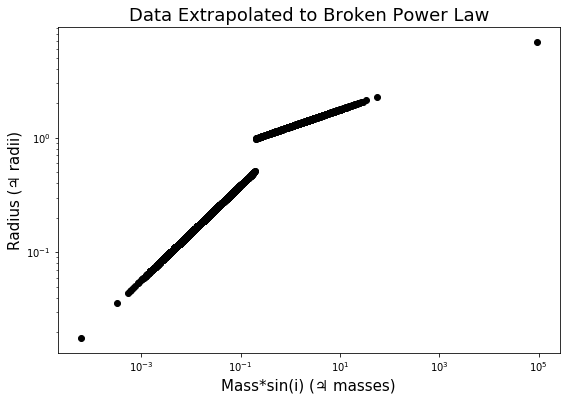

In [30]:
# Plotting all extrapolated data


# assigning data to x/y variables for convenience
xx = massesInc2
yy = radiiInc2
x = massesInc
y = radiiInc

plt.figure(figsize=(9,6))
plt.loglog(xx, yy, 'ok')
plt.loglog(x, y, 'ok')
plt.xlabel('Mass*sin(i) (\u2643 masses)', fontsize=15)
plt.ylabel('Radius (\u2643 radii)', fontsize=15)
plt.title('Data Extrapolated to Broken Power Law', fontsize=18)
plt.savefig('ALLextrapolateddata.png')

Red; Data for which the mass was extrapolated.
Blue; Data for which the radius was extrapolated
Black; Data for which both mass and radius were observed and recorded


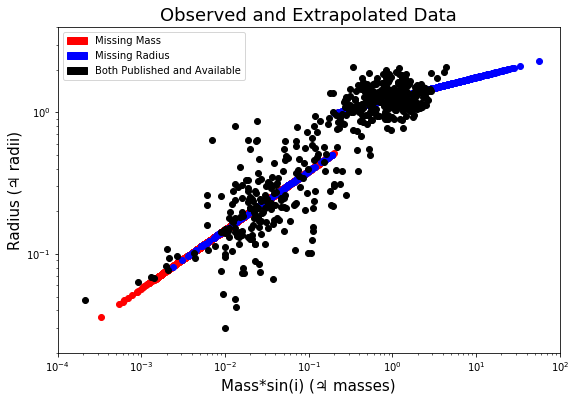

In [31]:
# Plotting all extrapolated data WITH original data set


# assigning data to x/y variables for convenience
xx = massesInc2
yy = radiiInc2
x = massesInc
y = radiiInc
xxx = massesObs
yyy = radiiObs

plt.figure(figsize=(9,6))
plt.loglog(xx, yy, 'ok', color = 'r')
plt.loglog(x, y, 'ok', color = 'b')
plt.loglog(xxx, yyy, 'ok')
plt.xlabel('Mass*sin(i) (\u2643 masses)', fontsize=15)
plt.ylabel('Radius (\u2643 radii)', fontsize=15)
plt.xlim(10**(-4),10**2)
plt.ylim(2*10**(-2),4)
plt.title('Observed and Extrapolated Data', fontsize=18)
red_patch = mpatches.Patch(color='red', label='Missing Mass')
blue_patch = mpatches.Patch(color= 'blue', label = 'Missing Radius')
black_patch = mpatches.Patch(color = 'black', label = 'Both Published and Available')
plt.legend(handles=[red_patch, blue_patch, black_patch])
plt.savefig('OGwithExtrapoPlot.png')
print('Red; Data for which the mass was extrapolated.')
print('Blue; Data for which the radius was extrapolated')
print('Black; Data for which both mass and radius were observed and recorded')

### For Future Reference:
#### Semi Major Axis Call Reference: data[i][10]
#### Host Mass Call Reference: data[i][58]

In [32]:
allMasses = []
allRadii = []
allPlanets = []
allHostMasses = []
allSemis = []
bothIsNan = []
massNan = []
radiusNan = []
hostNan = []
semisNan = []
allStellarRadii = []
allK = []
kNan = []


for i in range(0,3835):
    allMasses.append(data[i][22])
    allRadii.append(data[i][27])
    allPlanets.append(data[i][3])
    allHostMasses.append(data[i][58])
    allSemis.append(data[i][10])
    allStellarRadii.append(data[i][62])
    allK.append(data[i][84])
    if np.isnan(allMasses[i]) == True and np.isnan(allRadii[i]) == True:
        bothIsNan.append(True)
    else:
        bothIsNan.append(False)
    if np.isnan(allMasses[i]) == True:
        massNan.append(True)
    else:
        massNan.append(False)
    if np.isnan(allRadii[i]) == True:
        radiusNan.append(True)
    else:
        radiusNan.append(False)
    if np.isnan(allHostMasses[i]) == True:
        hostNan.append(True)
    else:
        hostNan.append(False)
    if np.isnan(allSemis[i]) == True:
        semisNan.append(True)
    else:
        semisNan.append(False)
    if np.isnan(allK[i]) == True:
        kNan.append(True)
    else:
        kNan.append(False)
        


In [33]:
# Removes planets for which both mass and radius are missing

useableMasses = allMasses
useableRadii = allRadii
useablePlanets = allPlanets
useableHostMasses = allHostMasses
useableSemis = allSemis 
useableStellar = allStellarRadii
useableK = allK

i = 0
while i  < len(useableMasses):
    if bothIsNan[i] == True or hostNan[i] == True or semisNan[i] == True:
        useableMasses.pop(i)
        useableRadii.pop(i)
        useablePlanets.pop(i)
        useableHostMasses.pop(i)
        useableSemis.pop(i)
        massNan.pop(i)
        radiusNan.pop(i)
        useableStellar.pop(i)
        useableK.pop(i)
    i += 1

In [34]:
# Calculates Radius From Mass

for i in range(0, len(useableMasses)):
    if massNan[i] == True:
        if useableRadii[i] <= 0.5130233582040606:
            useableMasses[i] = (np.power(10,np.log10(useableRadii[i])/0.4147))
        if 0.9828629879254385 <= useableRadii[i]:
            useableMasses[i] = (np.power(10,np.log10(useableRadii[i]/1.25)))
        

### Part D

In [35]:
# Converts masses from Jupiter Masses to Kilograms

# 1 jupiter mass = 1.898 × 10^27 kg
massesKg = np.multiply(1.898*(10**27),useableMasses)

# Converts the semimajor axes from au to meters

# 1 au = 1.496e+11
semisM = np.multiply(1.496*(10**11),useableSemis)

# Converts host masses from solar masses to kg

# 1 solar mass  = 1.98847±0.00007 × 10^30 kg
hostMassKg = np.multiply(1.98847*(10**30),useableHostMasses)


In [36]:
G = 6.674*(10**-11) #gravitational constant

In [37]:
# Calculates K for planets

K = []

for i in range(0,len(massesKg)):
    K.append((G**(0.5))*(massesKg[i])*((hostMassKg[i] + massesKg[i])**(-(0.5)))*(semisM[i])**(-0.5))


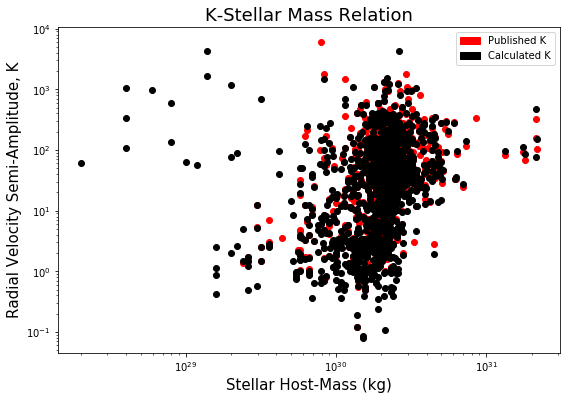

In [38]:
# Plots K as a function of host mass (incomplete_)


# assigning data to x/y variables for convenience
x = hostMassKg
y = K

plt.figure(figsize=(9,6))
plt.loglog(x,useableK, 'ok', color= 'r')
plt.loglog(x, y, 'ok')
plt.xlabel('Stellar Host-Mass (kg)', fontsize=15)
plt.ylabel('Radial Velocity Semi-Amplitude, K', fontsize=15)
plt.title('K-Stellar Mass Relation', fontsize=18)
red_patch = mpatches.Patch(color='red', label='Published K')
black_patch = mpatches.Patch(color = 'black', label = 'Calculated K')
plt.legend(handles=[red_patch, black_patch])
plt.savefig('Ksolarmass.png')

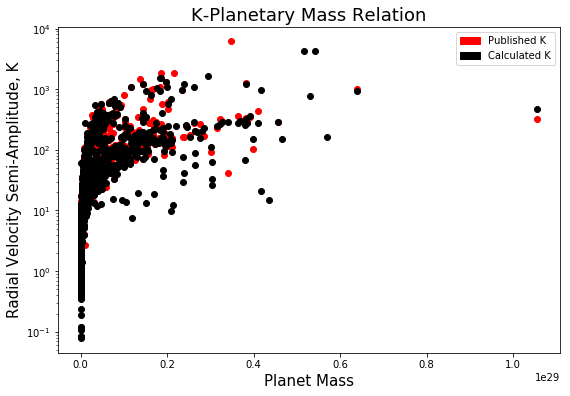

In [39]:
# Plots K as a function of host mass


# assigning data to x/y variables for convenience
x = massesKg
y = K

plt.figure(figsize=(9,6))
plt.semilogy(x,useableK, 'ok', color= 'r')
plt.semilogy(x, y, 'ok')
plt.xlabel('Planet Mass', fontsize=15)
plt.ylabel('Radial Velocity Semi-Amplitude, K', fontsize=15)
plt.title('K-Planetary Mass Relation', fontsize=18)
red_patch = mpatches.Patch(color='red', label='Published K')
black_patch = mpatches.Patch(color = 'black', label = 'Calculated K')
plt.legend(handles=[red_patch, black_patch])
plt.savefig('Kplanetmass.png')


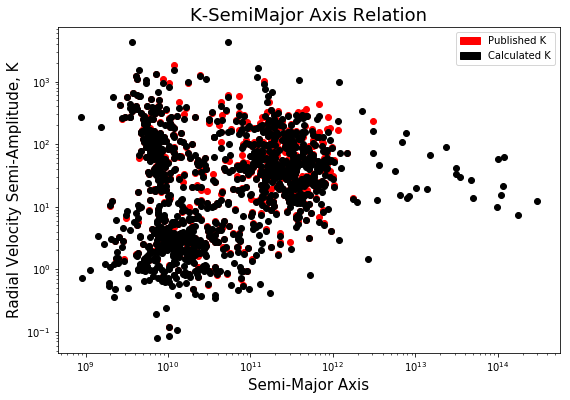

In [40]:
# Plots K as a function of host mass (incomplete_)


# assigning data to x/y variables for convenience
x = semisM
y = K

plt.figure(figsize=(9,6))
plt.loglog(x,useableK, 'ok', color= 'r')
plt.loglog(x, y, 'ok')
plt.xlabel('Semi-Major Axis', fontsize=15)
plt.ylabel('Radial Velocity Semi-Amplitude, K', fontsize=15)
plt.title('K-SemiMajor Axis Relation', fontsize=18)
red_patch = mpatches.Patch(color='red', label='Published K')
black_patch = mpatches.Patch(color = 'black', label = 'Calculated K')
plt.legend(handles=[red_patch, black_patch])
plt.savefig('ksemi.png')


### Part E

In [41]:
#Removing all rows of data from Planet Radii and Mass Columns and Stellar Radii where planet radius is provided
#or both mass and radius are missing
Pmasses_e = []
Pradii_e = []
Sradii_e = []
Semis_e = []

i = 0

#Appending rows without planet radii and with planet mass to new empty arrays.
while i < len(allMasses):
    if np.isnan(allMasses[i]) == False and np.isnan(allRadii[i]) == True and np.isnan(allStellarRadii[i]) == False:
        Pmasses_e.append(allMasses[i])
        Pradii_e.append(allRadii[i])
        Sradii_e.append(allStellarRadii[i])
        Semis_e.append(allSemis[i])
    i += 1
    
i = 0

#Applying inverse mass-relation to get planet radii.
while i < len(Pmasses_e):
    if Pmasses_e[i] > 0 and Pmasses_e[i] <= 0.2:
        Pradii_e[i] = Pmasses_e[i]**(0.4147)
    if Pmasses_e[i] > 0.2:
        Pradii_e[i] = 1.25*(Pmasses_e[i]**(0.1249387))
    i += 1


transitdepth_e = []

i = 0

#Converting both Solar and Planetary radii to meters.
Pradii_e_m = np.multiply(Pradii_e,4.1492*10**7)
Sradii_e_m = np.multiply(Sradii_e,695700*10**3)

#Finding transit depth
while i < len(Pradii_e_m):
    transitdepth_e.append((Pradii_e_m[i]/Sradii_e_m[i])**2)
    i += 1

i = 0

#Our F1 is 1 when looking at transit depth. Our F2 is 1 - transit depth. So, F2/F1 is (1 - transit depth)/1
Fluxratio= []
for i in range (0, len(transitdepth_e)):
    Fluxratio.append(1 - transitdepth_e[i])

#We have one negative value we need to eliminate

print(Fluxratio.index(min(Fluxratio)))

#Point of error is 389.Use pop to remove

Fluxratio.pop(389)

79


0.9937703364637941

In [42]:
#messes up here

delta_m = []
temp = 0

i = 0

while i < len(Fluxratio):
    temp = (np.log10(Fluxratio[i]))/(np.log10(2.514))
    delta_m.append(temp)
    i=i+1

Text(0.5,1,'Change in Magnitude of Host Stars for Exos Missing Radius')

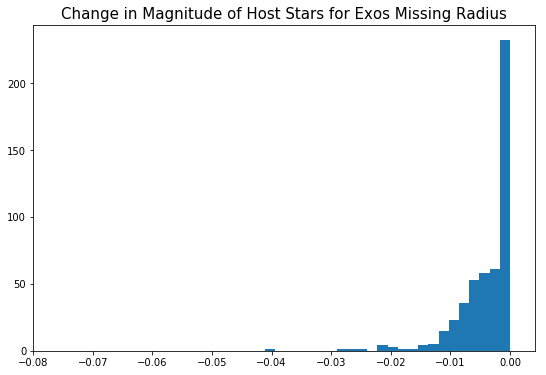

In [43]:
#We gucci
plt.figure(figsize = (9,6))
plt.hist(delta_m,bins=50)
plt.xlim(-0.08)
plt.savefig('deltamHisto.png')
plt.title('Change in Magnitude of Host Stars for Exos Missing Radius', fontsize= 15)
#print(len(delta_m))

In [44]:
prob_planets = []
Semis_e_hist = []
Sradii_e_hist = []

i = 0

while i < len(Semis_e):
    if np.isnan(Semis_e[i]) == False:
        Semis_e_hist.append(np.multiply(Semis_e[i],1.496*10**11))
        Sradii_e_hist.append(Sradii_e[i])
    i = i + 1
    
i = 0

while i < len(Semis_e_hist):
    prob_planets.append(np.divide(Sradii_e_hist[i],Semis_e_hist[i]))
    i = i + 1

#print(prob_planets)

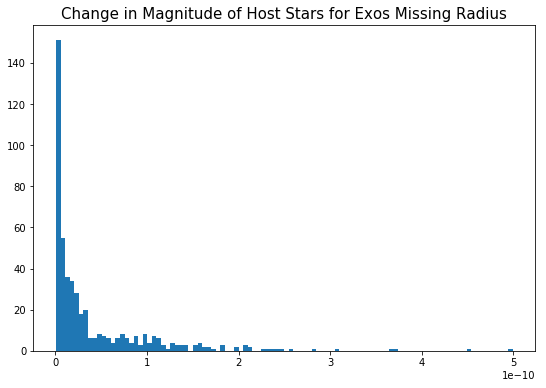

In [45]:
plt.figure(figsize = (9,6))
plt.hist(prob_planets,bins=100)
plt.title('Change in Magnitude of Host Stars for Exos Missing Radius', fontsize= 15)
plt.savefig('transitProbHistoMissingRadius.png')
#print(len(prob_planets))

In [46]:
both_Sradii = []
both_Semi = []

final_prob = []

i = 0

while i < len(allStellarRadii):
    if np.isnan(allSemis[i])==False and np.isnan(allStellarRadii[i])==False and np.isnan(allMasses[i])==False and np.isnan(allRadii[i])==False:
        both_Sradii.append(allStellarRadii[i])
        #print(i)
        both_Semi.append(allSemis[i])
    i = i+1
#print(both_Semi)

both_Sradii = np.multiply(both_Sradii,695700*10**3)
both_Semi = np.multiply(both_Semi,1.496*10**11)

i = 0

while i < len(both_Semi):
    final_prob.append(np.divide(both_Sradii[i],both_Semi[i]))
    #print(i)
    i = i+1




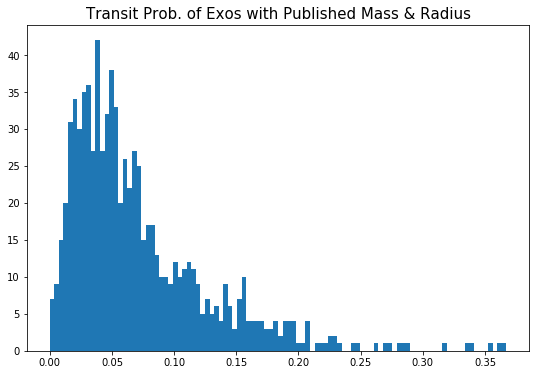

In [55]:
plt.figure(figsize = (9,6))
plt.hist(final_prob,bins=100)
plt.title('Transit Prob. of Exos with Published Mass & Radius', fontsize= 15)
plt.savefig('transitProbCompleteExos.png')
#print(len(final_prob))